In [105]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from scipy.stats import trim_mean
from statistics import variance
from statistics import stdev

viridis = cm.get_cmap("viridis", 6)
sns.color_palette("viridis", as_cmap=True)
sns.set_palette("viridis")

In [5]:
df_medals = pd.read_excel("./Medals.xlsx", engine="openpyxl")
df_medals

/home/claudinei/.local/lib/python3.6/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,Rank,Team/NOC,Gold,Silver,Bronze,Total,Rank by Total
0,1,United States of America,39,41,33,113,1
1,2,People's Republic of China,38,32,18,88,2
2,3,Japan,27,14,17,58,5
3,4,Great Britain,22,21,22,65,4
4,5,ROC,20,28,23,71,3
...,...,...,...,...,...,...,...
88,86,Ghana,0,0,1,1,77
89,86,Grenada,0,0,1,1,77
90,86,Kuwait,0,0,1,1,77
91,86,Republic of Moldova,0,0,1,1,77


## Estimates of Location

In [6]:
# Mean

df_medals["Total"].mean()

11.612903225806452

In [7]:
# Weighted Mean

np.average(df_medals["Total"], weights=df_medals["Gold"])

46.832352941176474

In [8]:
# Trimmed Mean

trim_mean(df_medals["Total"],0.1)

6.8933333333333335

In [9]:
# Median

df_medals["Total"].median()

4.0

In [10]:
# Weighted Median

def weighted_median(df, median_col, weight_col):
  df_sorted = df.sort_values(median_col)
  cumsum = df_sorted[weight_col].cumsum()
  cutoff = df_sorted[weight_col].sum() / 2.
  return df_sorted[cumsum >= cutoff][median_col].iloc[0]

weighted_median(df_medals, "Total", "Gold")

40

In [11]:
q3 = np.percentile(df_medals["Total"], 75)
q3

11.0

In [12]:
df_medals.describe()

,Rank,Gold,Silver,Bronze,Total,Rank by Total
count,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000
mean,46.333333,3.655914,3.634409,4.322581,11.612903,43.494624
std,26.219116,7.022471,6.626339,6.210372,19.091332,24.171769
min,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,24.000000,0.000000,0.000000,1.000000,2.000000,23.000000
50%,46.000000,1.000000,1.000000,2.000000,4.000000,47.000000
75%,70.000000,3.000000,4.000000,5.000000,11.000000,66.000000
max,86.000000,39.000000,41.000000,33.000000,113.000000,77.000000


## Estimates of Variability (Dispersion Metrics)

In [13]:
# Variance

variance(df_medals["Gold"])

49.315100514259

In [14]:
# Standard Deviatino

stdev(df_medals["Gold"])

7.022471111671376

In [15]:
# Mean absolute deviation

from numpy import mean, absolute

mean(absolute(df_medals["Gold"] - mean(df_medals["Gold"])))

4.0048560527228565

In [16]:
# Median absolute deviation from the median

from numpy import median

median(absolute(df_medals["Gold"] - median(df_medals["Gold"])))

1.0

In [17]:
# Interquatile Range

q3, q1 = np.percentile(df_medals["Gold"], [75,25])
iqr = q3 - q1
iqr

3.0

## Exploration Data Distribution

In [18]:
# Percentiles

df_medals["Gold"].quantile([0.05,0.25,0.5,0.75,0.95])

0.05     0.0
0.25     0.0
0.50     1.0
0.75     3.0
0.95    18.2
Name: Gold, dtype: float64

<AxesSubplot:>

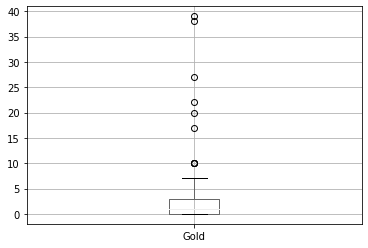

In [59]:
# Plots

df_medals.boxplot(column="Gold")

In [20]:
# Frequency Table

df_frequency = df_medals.copy()
df_frequency["Freq"] = pd.cut(df_medals["Gold"], 10)
df_frequency.groupby("Freq")["Rank"].count().reset_index()

,Freq,Rank
0,"(-0.039, 3.9]",72
1,"(3.9, 7.8]",11
2,"(7.8, 11.7]",4
3,"(11.7, 15.6]",0
4,"(15.6, 19.5]",1
5,"(19.5, 23.4]",2
6,"(23.4, 27.3]",1
7,"(27.3, 31.2]",0
8,"(31.2, 35.1]",0
9,"(35.1, 39.0]",2


(array([50., 11., 11.,  5.,  2.,  4.,  0.,  4.,  0.,  0.,  0.,  0.,  0.,
         1.,  0.,  1.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  2.]),
 array([ 0. ,  1.3,  2.6,  3.9,  5.2,  6.5,  7.8,  9.1, 10.4, 11.7, 13. ,
        14.3, 15.6, 16.9, 18.2, 19.5, 20.8, 22.1, 23.4, 24.7, 26. , 27.3,
        28.6, 29.9, 31.2, 32.5, 33.8, 35.1, 36.4, 37.7, 39. ]),
 <BarContainer object of 30 artists>)

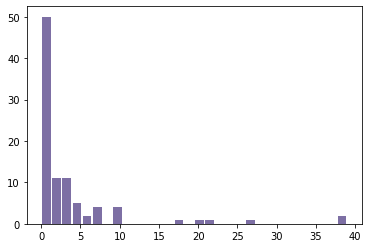

In [82]:
# Hist

plt.hist(x=df_medals["Gold"], bins="auto",alpha=0.7, rwidth=0.85)

<AxesSubplot:ylabel='Density'>

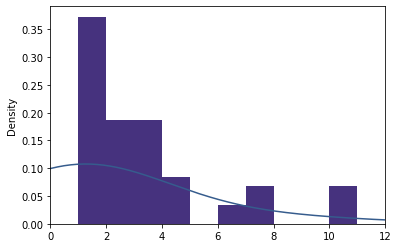

In [85]:
# Density Plot

ax = df_medals["Gold"].plot.hist(density=True, xlim=[0,12], bins=range(1,12))
df_medals["Gold"].plot.density(ax=ax)

## Exploring Binary adn Categorical Data

In [23]:
# Mode

df_medals["Gold"].mode()

0    0
dtype: int64

In [24]:
# Expected Value

np.mean(df_medals["Gold"])

3.6559139784946235

In [25]:
# Variance 

np.var(df_medals["Gold"])

48.784830616256215

Text(0, 0.5, 'Country')

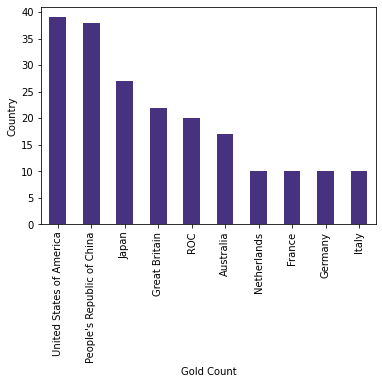

In [86]:
# Bar Chart

ax = df_medals.iloc[:10,:].plot.bar(x="Team/NOC", y="Gold", legend=False)
ax.set_xlabel("Gold Count")
ax.set_ylabel("Country")

<AxesSubplot:ylabel='Gold'>

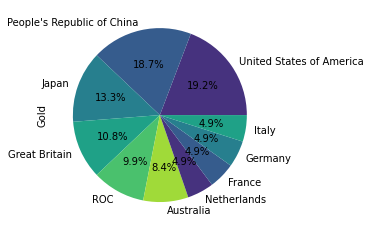

In [87]:
# Pie Chart

df_medals.iloc[:10,:].plot.pie(y="Gold", labels=df_medals["Team/NOC"],autopct="%1.1f%%", legend=False)

## Cerrelation

In [28]:
# Corralation Matrix

corr = df_medals.corr()
corr

,Rank,Gold,Silver,Bronze,Total,Rank by Total
Rank,1.000000,-0.655477,-0.597835,-0.637166,-0.655877,0.873539
Gold,-0.655477,1.000000,0.929046,0.862425,0.970840,-0.626012
Silver,-0.597835,0.929046,1.000000,0.862646,0.969439,-0.632831
Bronze,-0.637166,0.862425,0.862646,1.000000,0.941941,-0.745573
Total,-0.655877,0.970840,0.969439,0.941941,1.000000,-0.692450
Rank by Total,0.873539,-0.626012,-0.632831,-0.745573,-0.692450,1.000000


<AxesSubplot:>

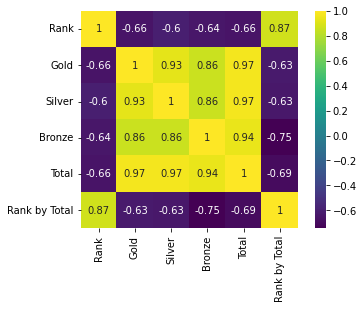

In [79]:
# Corralation Plot

sns.heatmap(corr, cmap="viridis", square=True, annot=True)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='Gold', ylabel='Silver'>

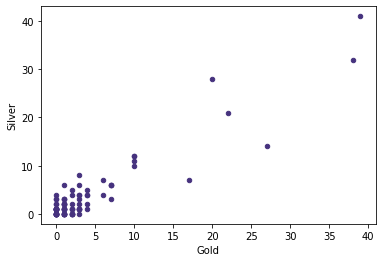

In [30]:
# Plot Scatter

df_medals.plot.scatter(x="Gold", y="Silver", cmap="viridis")

In [48]:
# Contigency Table

crosstbl = df_medals[["Silver", "Gold"]].pivot_table(index="Silver", columns="Gold", aggfunc=lambda x: len(x), margins=True)
crosstbl.fillna(0, inplace=True)
crosstbl

Gold,0,1,2,3,4,6,7,10,17,20,22,27,38,39,All
Silver,,,,,,,,,,,,,,,
0,11.0,7.0,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24
1,12.0,6.0,3.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26
2,2.0,5.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10
3,2.0,3.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7
4,1.0,0.0,1.0,2.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7
5,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
6,0.0,1.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
7,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2
8,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


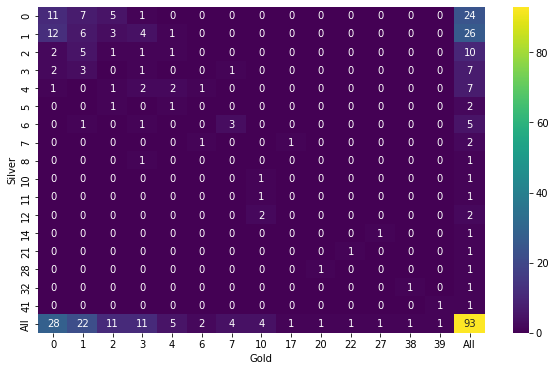

In [109]:
# Plot Contigency Table
ax = plt.subplots(figsize=(10, 6))
ax = sns.heatmap(crosstbl, annot=True, cmap="viridis")